<a href="https://colab.research.google.com/github/Leo-Balbi/Trabajo_de_Estadistica_y_probabilidad/blob/main/Trabajo_de_Estadistica_y_probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -------------------------------------------------------------------
# EJERCICIO 1 – Estadística Descriptiva (Media, Mediana, Varianza, Desviación estándar)
# -------------------------------------------------------------------
Instrucciones: Crea un conjunto de datos simulado de ingresos de 100 personas
y calcula desde cero:
 - Media
 - Mediana
 - Varianza
 - Desviación estándar
 - Coeficiente de variación

In [ ]:
import numpy as np
import math
import pandas as pd


In [ ]:
# MEDIA
def calcular_media(datos):
    return sum(datos) / len(datos)

In [ ]:
# MEDIANA
def calcular_mediana(datos):
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)
    mitad = n // 2
    if n % 2 == 0:
        return (datos_ordenados[mitad - 1] + datos_ordenados[mitad]) / 2
    else:
        return datos_ordenados[mitad]

In [ ]:
# VARIANZA (poblacional)
def calcular_varianza(datos):
    media = calcular_media(datos)
    return sum((x - media) ** 2 for x in datos) / len(datos)

In [ ]:
# DESVIACIÓN ESTÁNDAR
def calcular_desviacion_estandar(datos):
    return calcular_varianza(datos) ** 0.5

In [ ]:
# COEFICIENTE DE VARIACIÓN (en %)
def calcular_coeficiente_variacion(datos):
    media = calcular_media(datos)
    desviacion = calcular_desviacion_estandar(datos)
    return (desviacion / media) * 100


#Cálculo


In [ ]:
#datos simulados
np.random.seed(0)
ingresos = np.random.normal(loc=2000, scale=500, size=100)
ingresos = ingresos.round(2)

def calcular_media(datos):
    return sum(datos) / len(datos)

def calcular_mediana(datos):
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)
    mitad = n // 2
    if n % 2 == 0:
        return (datos_ordenados[mitad - 1] + datos_ordenados[mitad]) / 2
    else:
        return datos_ordenados[mitad]

def calcular_varianza(datos):
    media = calcular_media(datos)
    return sum((x - media) ** 2 for x in datos) / len(datos)

def calcular_desviacion_estandar(datos):
    return calcular_varianza(datos) ** 0.5

def calcular_coeficiente_variacion(datos):
    media = calcular_media(datos)
    desviacion = calcular_desviacion_estandar(datos)
    return (desviacion / media)

#Cálculos
media = calcular_media(ingresos)
mediana = calcular_mediana(ingresos)
varianza = calcular_varianza(ingresos)
desviacion = calcular_desviacion_estandar(ingresos)
coef_var = calcular_coeficiente_variacion(ingresos)

# Resultados
print(" Estadísticas desde cero")
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Coeficiente de variación: {coef_var:.2f}%")


=== Estadísticas desde cero ===
Media: 2029.90
Mediana: 2047.05
Varianza: 253957.13
Desviación estándar: 503.94
Coeficiente de variación: 0.25%


# -------------------------------------------------------------------
# EJERCICIO 2 – Z-score y Detección de Outliers
# -------------------------------------------------------------------
Instrucciones: Utiliza el conjunto de ingresos del ejercicio anterior
y calcula el z-score para cada valor. Luego identifica los valores atípicos
(aquellos con z-score mayor a 3 o menor a -3)

#Modificamos valores y agregamos datos para reflejar mejor los números.



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# outliers artificiales
ingresos_con_outliers = ingresos.copy()

# Insertamos manualmente 3 valores
ingresos_con_outliers[5] = 5000
ingresos_con_outliers[20] = 800
ingresos_con_outliers[77] = 6000


#Calcular Z-scores y detectar outliers

In [ ]:
z_scores = [(x - calcular_media(ingresos_con_outliers)) / calcular_desviacion_estandar(ingresos_con_outliers)
            for x in ingresos_con_outliers]

# Detecta outliers
outlier_indices = [i for i, z in enumerate(z_scores) if abs(z) > 3]
valores_outliers = [ingresos_con_outliers[i] for i in outlier_indices]

#consola
print("Detección de Outliers con Z-score ")
print(f"Cantidad de outliers detectados: {len(outlier_indices)}")
print("Índices:", outlier_indices)
print("Valores:", valores_outliers)



=== Detección de Outliers con Z-score (modificado) ===
Cantidad de outliers detectados: 2
Índices: [5, 77]
Valores: [np.float64(5000.0), np.float64(6000.0)]


#visualización

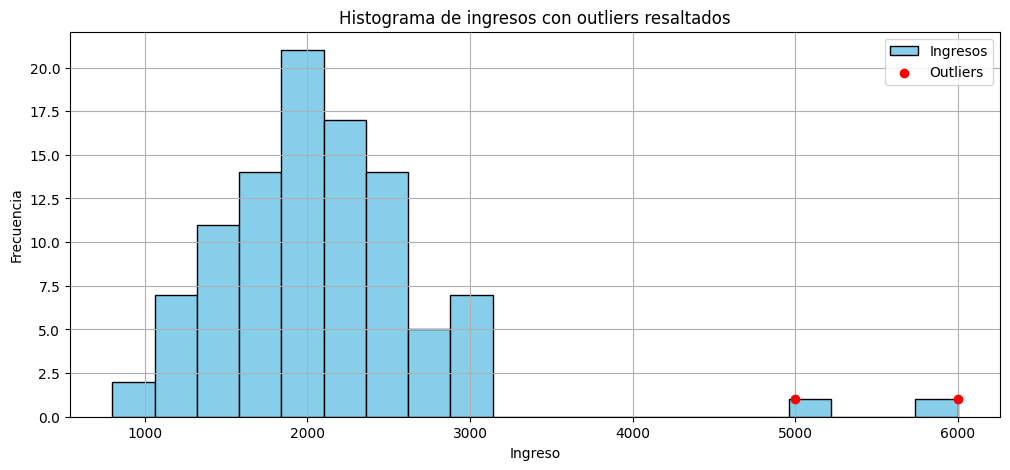

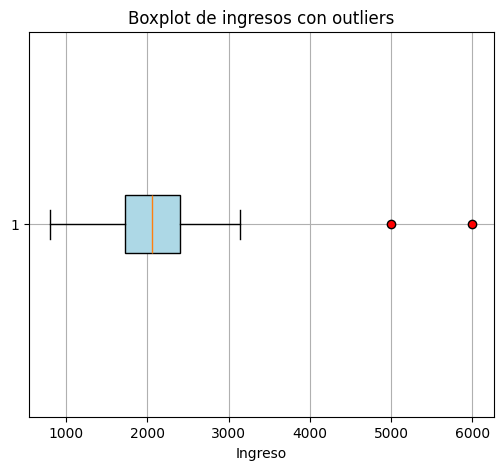

In [ ]:
#outlier registrados
plt.figure(figsize=(12, 5))
plt.hist(ingresos_con_outliers, bins=20, color='skyblue', edgecolor='black', label='Ingresos')
plt.scatter(valores_outliers, [1]*len(valores_outliers), color='red', label='Outliers', zorder=5)
plt.title("Histograma de ingresos con outliers resaltados")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()

# boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(ingresos_con_outliers, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.title("Boxplot de ingresos con outliers")
plt.xlabel("Ingreso")
plt.grid(True)
plt.show()


# -------------------------------------------------------------------
# EJERCICIO 3 – Probabilidad Frecuentista y Simulación
# -------------------------------------------------------------------
Instrucciones: Simula 10.000 lanzamientos de una moneda justa con NumPy.
Luego calcula:
- La frecuencia relativa de caras y cruces
- La probabilidad estimada de obtener al menos 3 caras en 5 lanzamientos consecutivos (repetido 10.000 veces)

In [ ]:
import numpy as np


# Lanzamientos individuales


In [ ]:

np.random.seed(0)

# 0 =cruz, 1 = cara
lanzamientos = np.random.choice([0, 1], size=10000)

# frecuencia relativa
caras = np.sum(lanzamientos == 1)
cruces = np.sum(lanzamientos == 0)

frecuencia_caras = caras / len(lanzamientos)
frecuencia_cruces = cruces / len(lanzamientos)

print(" Frecuencia relativa ")
print(f"Frecuencia relativa de caras: {frecuencia_caras:.4f}")
print(f"Frecuencia relativa de cruces: {frecuencia_cruces:.4f}")




=== Parte 1: Frecuencia relativa ===
Frecuencia relativa de caras: 0.5085
Frecuencia relativa de cruces: 0.4915


#Probabilidad de ≥ 3 caras en 5 lanzamientos

In [ ]:
repeticiones = 10000
conteo_casos_favorables = 0

for _ in range(repeticiones):
    secuencia = np.random.choice([0, 1], size=5)
    if np.sum(secuencia) >= 3:  # al menos 3 caras
        conteo_casos_favorables += 1

probabilidad_estimada = conteo_casos_favorables / repeticiones

print(" Probabilidad estimada")
print(f"Probabilidad de obtener al menos 3 caras en 5 lanzamientos: {probabilidad_estimada:.4f}")

 Probabilidad estimada
Probabilidad de obtener al menos 3 caras en 5 lanzamientos: 0.5030


# -------------------------------------------------------------------
# EJERCICIO 4 – Distribuciones: Bernoulli, Binomial y Poisson
# -------------------------------------------------------------------
Instrucciones:

A. Simula una distribución Bernoulli con p = 0.3 y 1.000 observaciones

B. Simula una distribución Binomial con n = 10, p = 0.4 y 1.000 observaciones

- . Simula una distribución de Poisson con lambda = 5 y 1.000 observaciones
 Para cada una:
- Calcula la media y la varianza manualmente
- Grafica el histograma de frecuencias (opcional)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Funciones

In [ ]:
def calcular_media(datos):
    return sum(datos) / len(datos)

def calcular_varianza(datos):
    media = calcular_media(datos)
    return sum((x - media) ** 2 for x in datos) / len(datos)

###Distribución de Bernoulli (p = 0.3)

Bernoulli 
Media: 0.2870
Varianza: 0.2046


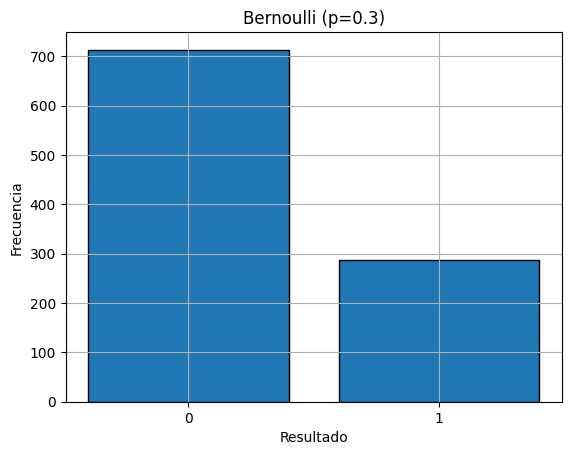

In [ ]:
bernoulli = np.random.binomial(n=1, p=0.3, size=1000)
media_ber = calcular_media(bernoulli)
varianza_ber = calcular_varianza(bernoulli)

print("Bernoulli ")
print(f"Media: {media_ber:.4f}")
print(f"Varianza: {varianza_ber:.4f}")

plt.figure()
plt.hist(bernoulli, bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1])
plt.title("Bernoulli (p=0.3)")
plt.xlabel("Resultado")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

### B. Distribución Binomial (n = 10, p = 0.4)


= Binomial
Media: 3.9800
Varianza: 2.4896


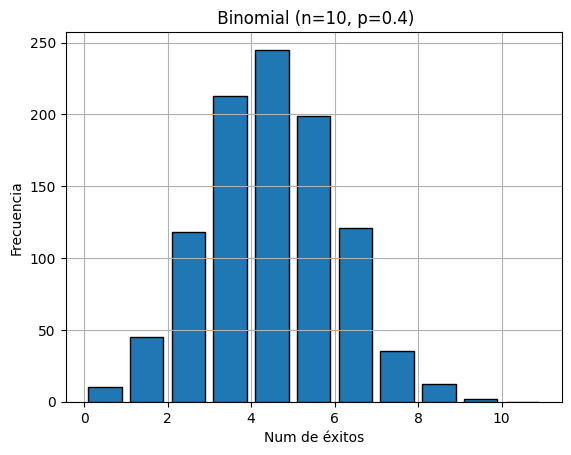

In [ ]:
binomial = np.random.binomial(n=10, p=0.4, size=1000)
media_bin = calcular_media(binomial)
varianza_bin = calcular_varianza(binomial)

print(" Binomial")
print(f"Media: {media_bin:.4f}")
print(f"Varianza: {varianza_bin:.4f}")

plt.figure()
plt.hist(binomial, bins=range(0, 12), edgecolor='black', rwidth=0.8)
plt.title(" Binomial (n=10, p=0.4)")
plt.xlabel("Num de éxitos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

###C. Distribución de Poisson (λ = 5)


Distribución de Poisson
Media: 4.9130
Varianza: 4.9714


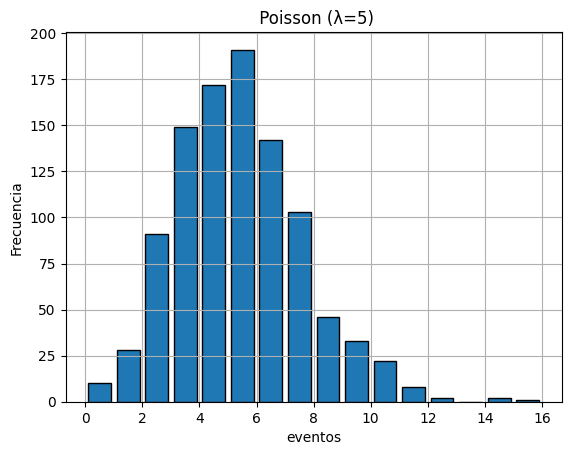

In [ ]:
poisson = np.random.poisson(lam=5, size=1000)
media_pois = calcular_media(poisson)
varianza_pois = calcular_varianza(poisson)

print("Distribución de Poisson")
print(f"Media: {media_pois:.4f}")
print(f"Varianza: {varianza_pois:.4f}")

plt.figure()
plt.hist(poisson, bins=range(0, max(poisson)+2), edgecolor='black', rwidth=0.8)
plt.title(" Poisson (λ=5)")
plt.xlabel("eventos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# EJERCICIO 5 – Intervalo de confianza para la media
# -------------------------------------------------------------------
Instrucciones:

Genera una muestra aleatoria de 50 valores de una variable simulada (por ejemplo, altura)
Calcula un intervalo de confianza del 95% para la media poblacional, utilizando solo operaciones básicas y z = 1.96

In [ ]:
import numpy as np


In [ ]:
np.random.seed(0)

#muestra simulada (alturas entre 150 y 190 cm) ===
muestra = np.random.normal(loc=170, scale=10, size=50)  # media=170, desvío=10

# media muestral
media_muestral = sum(muestra) / len(muestra)

#desviación estándar muestral
n = len(muestra)
desviacion = (sum((x - media_muestral)**2 for x in muestra) / (n - 1))**0.5  # muestral: n - 1

# error estándar
error_estandar = desviacion / (n ** 0.5)

# intervalo de confianza (z = 1.96)
z = 1.96
limite_inferior = media_muestral - z * error_estandar
limite_superior = media_muestral + z * error_estandar

# resultados
print("Intervalo de Confianza para la Media (95%)")
print(f"Media: {media_muestral:.2f} cm")
print(f"Desviación: {desviacion:.2f} cm")
print(f"Erro: {error_estandar:.2f} cm")
print(f"Intervalo de confianza (95%): [{limite_inferior:.2f} ; {limite_superior:.2f}] cm")


=== Intervalo de Confianza para la Media (95%) ===
Media muestral: 171.41 cm
Desviación estándar muestral: 11.37 cm
Error estándar: 1.61 cm
Intervalo de confianza (95%): [168.25 ; 174.56] cm


# -------------------------------------------------------------------
# EJERCICIO 6 – Prueba de hipótesis para proporciones
# -------------------------------------------------------------------
Instrucciones:

 Supón que se encuestaron 400 personas y 344 están vacunadas.
Realiza una prueba de hipótesis para evaluar si la proporción real es menor al 90%.

Usa una prueba unilateral y calcula:
- Hipótesis
- Estadístico z
- Valor-p aproximado (utilizando una función propia de CDF de la normal)

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

#Datos que tenemos

In [ ]:
n = 400
x = 344
p_hat = x / n
p0 = 0.90

z = (p_hat - p0) / math.sqrt(p0 * (1 - p0) / n)

##Función para la CDF de la normal

In [ ]:
def normal_cdf(z):
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

##Valor -p unilateral

In [ ]:
p_value = normal_cdf(z)

Resultado

In [ ]:



print("Hipótesis para Proporciones")
print(f"H0: p = {p0}")
print("H1: p < 0.90 (unilateral izquierda)")

print(f"muestral: {p_hat:.4f}")
print(f" z: {z:.4f}")
print(f"Valor-p (aproximado): {p_value:.4f}")


if p_value < 0.05:
    print("Se rechaza H0: la proporción es menor al 90%.")
else:
    print("No se rechaza H0: NO hay evidencia suficiente de que sea menor al 90%.")


Hipótesis para Proporciones
H0: p = 0.9
H1: p < 0.90 (unilateral izquierda)
muestral: 0.8600
 z: -2.6667
Valor-p (aproximado): 0.0038
Se rechaza H0: la proporción es menor al 90%.


#Graficamos

##Parámetros

In [ ]:
z_val = z
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

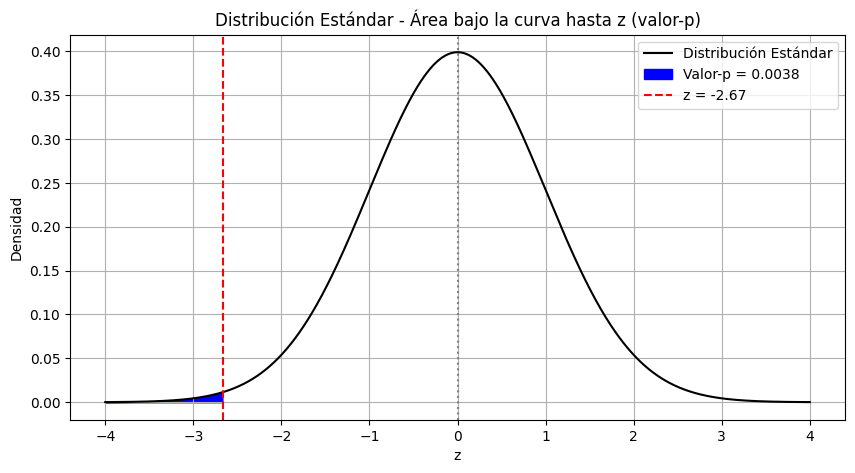

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribución Estándar', color='black')
plt.fill_between(x, 0, y, where=(x <= z_val), color='blue', label=f'Valor-p = {p_value:.4f}')
plt.axvline(z_val, color='red', linestyle='--', label=f'z = {z_val:.2f}')
plt.axvline(0, color='gray', linestyle=':')

plt.title("Distribución Estándar - Área bajo la curva hasta z (valor-p)")
plt.xlabel("z")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()

* La línea roja representa el estadístico z.
* El área azul sombreada muestra el valor-p de la prueba unilateral izquierda.
* Si ese área es menor que 0.05, se puede rechazar H₀ con un nivel de significancia del 5%.



# -------------------------------------------------------------------
# EJERCICIO 7 – Correlación de Pearson desde cero
# -------------------------------------------------------------------
Instrucciones: Simula dos variables con relación lineal e introduce algo de ruido.
Calcula la correlación de Pearson utilizando únicamente operaciones aritméticas básicas (no .corr())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de datos relacionados linealmente

In [ ]:
np.random.seed(0)

x = np.linspace(0, 100, 100)
ruido = np.random.normal(0, 10, 100)
y = 0.5 * x + 5 + ruido  # Relación lineal + ruido

# Calcular medias
media_x = sum(x) / len(x)
media_y = sum(y) / len(y)

# Calcular numerador y denominadores
numerador = sum((xi - media_x) * (yi - media_y) for xi, yi in zip(x, y))
den_x = sum((xi - media_x)**2 for xi in x)
den_y = sum((yi - media_y)**2 for yi in y)

#correlación de Pearson
r = numerador / (den_x**0.5 * den_y**0.5)

#Resultado
print(" Correlación de Pearson desde cero")
print(f"Coeficiente de correlación: {r:.4f}")


 Correlación de Pearson desde cero
Coeficiente de correlación: 0.8068


##Grafica

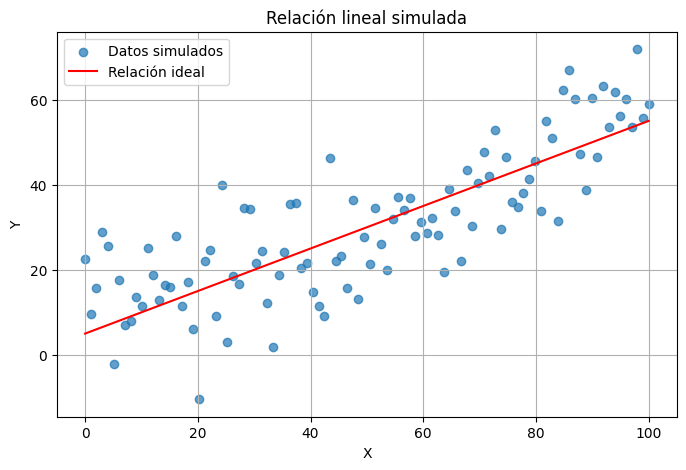

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos simulados", alpha=0.7)
plt.plot(x, 0.5*x + 5, color='red', label="Relación ideal")
plt.title("Relación lineal simulada")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


# -------------------------------------------------------------------
# EJERCICIO 8 – Correlación de Spearman desde cero
# -------------------------------------------------------------------
Instrucciones: Simula dos variables con relación monotónica (no lineal).
Asigna rangos y calcula Spearman usando la fórmula basada en rangos y diferencia de rangos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Simular datos con relación monotónica

In [ ]:
np.random.seed(0)

x = np.linspace(0, 10, 100)
ruido = np.random.normal(0, 1, 100)
y = x**2 + ruido  # relación + ruido

##Función

In [ ]:
def asignar_rangos(arr):
    ordenado = sorted((val, idx) for idx, val in enumerate(arr))
    rangos = [0] * len(arr)
    for rango, (_, idx) in enumerate(ordenado, 1):
        rangos[idx] = rango
    return rangos

# Asignamos rangos
rangos_x = asignar_rangos(x)
rangos_y = asignar_rangos(y)

#Calculamos diferencias de rangos y Spearman
n = len(x)
d2 = sum((rx - ry)**2 for rx, ry in zip(rangos_x, rangos_y))

r_s = 1 - (6 * d2) / (n * (n**2 - 1))

# Resultados
print("Correlación de Spearman desde cero")
print(f"Coeficiente de Spearman: {r_s:.4f}")


Correlación de Spearman desde cero
Coeficiente de Spearman: 0.9961


##Grafica

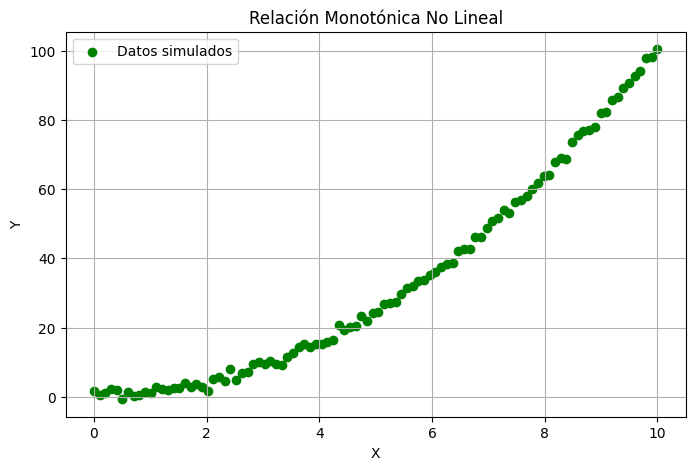

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Datos simulados", color="green")
plt.title("Relación Monotónica No Lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


Un valor alto de correlación entre 0.95 y 0.99 porque la relación es monótonamente creciente (aunque no lineal).

# -------------------------------------------------------------------
# EJERCICIO 9 – Correlación de Kendall desde cero
# -------------------------------------------------------------------
Instrucciones:

Simula dos variables no correlacionadas linealmente.
Asigna rangos y calcula Kendall

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

# Simular dos variables sin relación lineal
n = 50
x = np.linspace(0, 10, n)
y = np.random.permutation(x) + np.random.normal(0, 1, n)  # desorden y ruido

#Calcular pares concordantes y discordantes
n_c = 0  # concordantes
n_d = 0  # discordantes

for i in range(n):
    for j in range(i+1, n):
        dx = x[i] - x[j]
        dy = y[i] - y[j]
        prod = dx * dy
        if prod > 0:
            n_c += 1
        elif prod < 0:
            n_d += 1
        # si prod == 0, es empate y se ignora

##Calcular Tau de Kendall

In [ ]:
tau = (n_c - n_d) / (n * (n - 1) / 2)

##Resultado
* Si "x" e "y" no están correlacionados, entonces 𝜏τ estará cerca de 0.
* Si hay orden creciente o decreciente, 𝜏τ se acerca a 1 o -1 respectivamente.

In [ ]:
print("Correlación de Kendall desde cero")
print(f"Pares concordantes: {n_c}")
print(f"Pares discordantes: {n_d}")
print(f"Coeficiente de Kendall tau: {tau:.4f}")

=== Correlación de Kendall desde cero ===
Pares concordantes: 617
Pares discordantes: 608
Coeficiente de Kendall tau: 0.0073


##Grafica

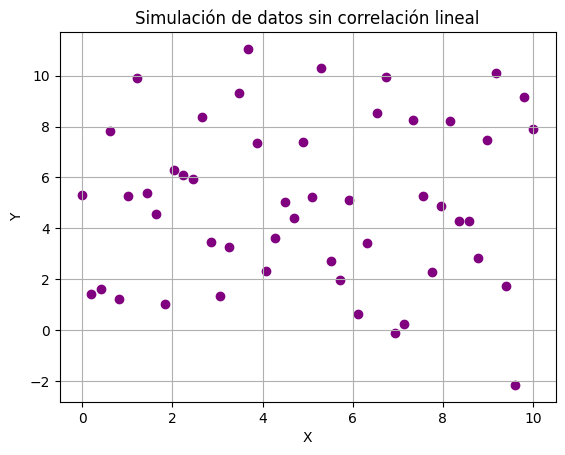

In [ ]:
plt.scatter(x, y, color='purple')
plt.title("Simulación de datos sin correlación lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# -------------------------------------------------------------------
# EJERCICIO 10 – Análisis de una base de datos real
# -------------------------------------------------------------------

Instrucciones:

Carga un dataset sencillo con pandas (puede ser CSV simulado).

Realiza:
- Estadística descriptiva por variable
- Identificación de correlaciones
- Gráficos básicos y detección de outliers
- Conclusiones en texto sobre las relaciones encontradas

#DataSet - “Titanic” (Desde Kaggle)
###- Estadística y Visualización -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv")

traducciones = {
    'Fare': 'Tarifa',
    'Age': 'Edad',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase',
    'SibSp': 'Hermanos/Conyuge',
    'Parch': 'Padres/Hijos'
}
df.rename(columns=traducciones, inplace=True)

##Carga

In [ ]:
# Estadística descriptiva
print(" Estadística Descriptiva")
print(df.describe(include='all').T)

# Correlaciones numéricas
print("\n=== Correlaciones ===")
correlaciones = df.select_dtypes(include=['int64', 'float64']).corr()
print(correlaciones)



 Estadística Descriptiva
                  count unique                  top freq       mean  \
PassengerId       891.0    NaN                  NaN  NaN      446.0   
Sobrevivio        891.0    NaN                  NaN  NaN   0.383838   
Clase             891.0    NaN                  NaN  NaN   2.308642   
Name                891    891  Dooley, Mr. Patrick    1        NaN   
Sex                 891      2                 male  577        NaN   
Edad              714.0    NaN                  NaN  NaN  29.699118   
Hermanos/Conyuge  891.0    NaN                  NaN  NaN   0.523008   
Padres/Hijos      891.0    NaN                  NaN  NaN   0.381594   
Ticket              891    681               347082    7        NaN   
Tarifa            891.0    NaN                  NaN  NaN  32.204208   
Cabin               204    147                   G6    4        NaN   
Embarked            889      3                    S  644        NaN   

                         std   min     25%      50%

##Grafica

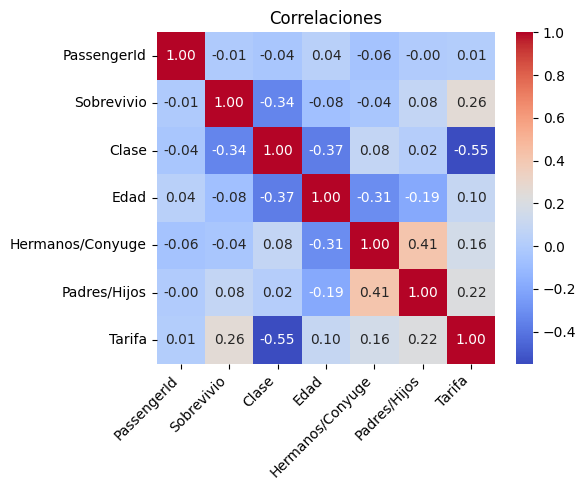

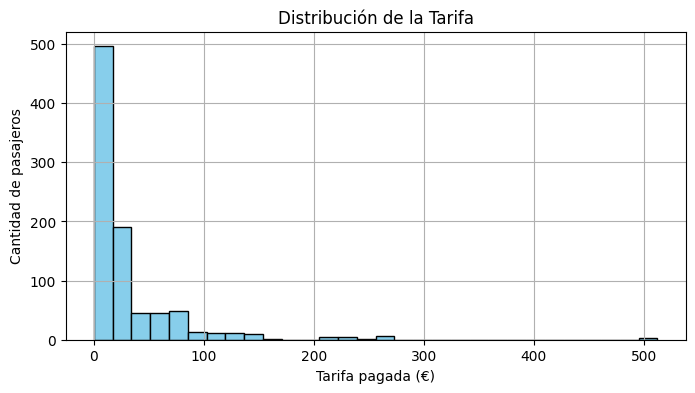

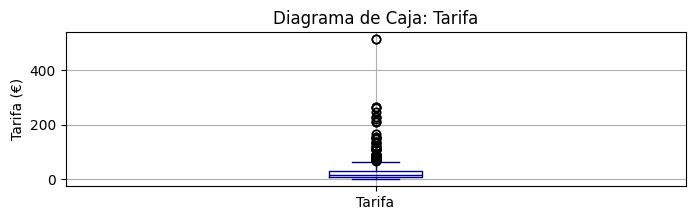


=== Outliers en Tarifa ===
Se detectaron 116 outliers.
    PassengerId    Tarifa
1             2   71.2833
27           28  263.0000
31           32  146.5208
34           35   82.1708
52           53   76.7292


In [ ]:
# Mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlaciones")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Histograma de Tarifa
plt.figure(figsize=(8, 4))
df['Tarifa'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de la Tarifa")
plt.xlabel("Tarifa pagada (€)")
plt.ylabel("Cantidad de pasajeros")
plt.grid(True)
plt.show()

# Boxplot de Tarifa
plt.figure(figsize=(8, 2))
df['Tarifa'].plot(kind='box', color='darkblue')
plt.title("Diagrama de Caja: Tarifa")
plt.ylabel("Tarifa (€)")
plt.grid(True)
plt.show()

# Detección de outliers
Q1 = df['Tarifa'].quantile(0.25)
Q3 = df['Tarifa'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Tarifa'] < Q1 - 1.5 * IQR) | (df['Tarifa'] > Q3 + 1.5 * IQR)]
print("\n=== Outliers en Tarifa ===")
print(f"Se detectaron {len(outliers)} outliers.")
print(outliers[['PassengerId', 'Tarifa']].head())


##Conclución:
* Resumen descriptivo: Edad promedia X años, Tarifa tiene una media alta debido a outliers.
* Correlaciones: Se observa una correlación débil/moderada entre Edad y Tarifas, entre familia (Hermanos/Conyuge y Padres/Hijos) y Tarifas.
* Outliers: Tarifas muy altas asociadas a pocos pasajeros; podrían tener influencia en análisis futuros.
